In [1]:
pip install pandas

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ------------------- -------------------- 5.8/11.6 MB 35.3 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 48.3 MB/s eta 0:00:00
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------- ----------------------- 4.5/11.0 MB 24.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 38.3 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   --------------- ------------------------ 17.0/44.8 MB 82.6 MB/s eta 0:00:01
   ----------------------------- ---------- 32.8/44.8 MB 80.1 MB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 MB 77.0 MB/s eta 0:00:00
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.2-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install SHAP

  Using cached tqdm-4.67.0-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 38.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   ---------- ----------------------------- 4.2/15.9 MB 19.4 MB/s eta 0:00:01
   --------------- ------------------------ 6.0/15.9 MB 24.6 MB/s eta 0:00:01
   ---------------------------------------  15.7/15.9 MB 24.1 MB/s eta 0:00:01
   ---------------------------------------- 15.9/15.9 MB 23.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ---------------- ----------------------- 11.5/28.1 MB 79.9 MB/s eta 0:00:01
   -------------------------------------- - 27.0/28.1 MB 71.3 MB/s eta 0:00:01
   ---------------------------------------- 28.1/28.1 MB 63.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found

In [283]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import shap

In [284]:
%matplotlib inline

In [285]:
# Load the dataset
df = pd.read_csv('survey lung cancer (1).csv')

In [286]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0              

In [287]:
# Perform basic EDA
print("\nSummary of the dataset:")
print(df.describe(include='all'))


Summary of the dataset:
       GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count     309  309.000000  309.000000      309.000000  309.000000   
unique      2         NaN         NaN             NaN         NaN   
top         M         NaN         NaN             NaN         NaN   
freq      162         NaN         NaN             NaN         NaN   
mean      NaN   62.673139    1.563107        1.569579    1.498382   
std       NaN    8.210301    0.496806        0.495938    0.500808   
min       NaN   21.000000    1.000000        1.000000    1.000000   
25%       NaN   57.000000    1.000000        1.000000    1.000000   
50%       NaN   62.000000    2.000000        2.000000    1.000000   
75%       NaN   69.000000    2.000000        2.000000    2.000000   
max       NaN   87.000000    2.000000        2.000000    2.000000   

        PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count      309.000000       309.000000  309.000000  309.000000  309.

In [288]:
# Check for null values
print("\nChecking for null values:")
print(df.isnull().sum())


Checking for null values:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [289]:
# Check for duplicate entries and remove them if any
print("\nChecking for duplicate entries:")
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Checking for duplicate entries:
Number of duplicate rows: 33


In [290]:
# Standardize column names
df.columns = df.columns.str.strip()

In [291]:
# Map the 'LUNG_CANCER' column to binary values (1 for 'yes', 0 for 'no')
df['LUNG_CANCER_ENCODED'] = df['LUNG_CANCER'].map({'yes': 1, 'no': 0})

In [292]:
# Filter positive cases (Lung Cancer = 'yes' in original column)
positive_cases = df[df['LUNG_CANCER'] == 'yes']

In [293]:
# Check the first few rows to confirm positive cases are correctly filtered
print("First 5 rows of positive cases:")
print(positive_cases.head())

First 5 rows of positive cases:
Empty DataFrame
Columns: [GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE, CHRONIC DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL CONSUMING, COUGHING, SHORTNESS OF BREATH, SWALLOWING DIFFICULTY, CHEST PAIN, LUNG_CANCER, LUNG_CANCER_ENCODED]
Index: []


In [294]:
# Check the summary statistics of the 'AGE' column for positive cases
print("Summary statistics of 'AGE' for positive cases:")
print(positive_cases['AGE'].describe())

Summary statistics of 'AGE' for positive cases:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: AGE, dtype: float64


In [295]:
# Check the distribution of the target variable
print("\nDistribution of the target variable:")
print(df['LUNG_CANCER'].value_counts())


Distribution of the target variable:
LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64


In [296]:
# Check the counts of the 'SMOKING' and 'GENDER' columns for positive cases
print("Smoking status distribution in positive cases:")
print(positive_cases['SMOKING'].value_counts())
print("Gender distribution in positive cases:")
print(positive_cases['GENDER'].value_counts())

Smoking status distribution in positive cases:
Series([], Name: count, dtype: int64)
Gender distribution in positive cases:
Series([], Name: count, dtype: int64)


In [297]:
# Create a new dataframe containing only positive cases
# Normalize LUNG_CANCER column to handle case sensitivity and whitespace
df['LUNG_CANCER'] = df['LUNG_CANCER'].str.strip().str.upper()

# Filter positive cases
positive_cases = df[df['LUNG_CANCER'] == 'YES']

print(f"Number of rows in positive_cases: {len(positive_cases)}")
print(positive_cases.head())

Number of rows in positive_cases: 238
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
5      F   75        1               2        1              1   
6      M   52        2               1        1              1   
7      F   51        2               2        2              2   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
5                2        2        2         2                  1         2   
6                1        2        1         2                  2         2   
7                1        2        2         1                  1         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  \
0                

In [298]:
positive_cases = df[df['LUNG_CANCER'].notnull()]
print(positive_cases.head())  # Check if any rows with non-null LUNG_CANCER exist

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  \
0                    2                      2          

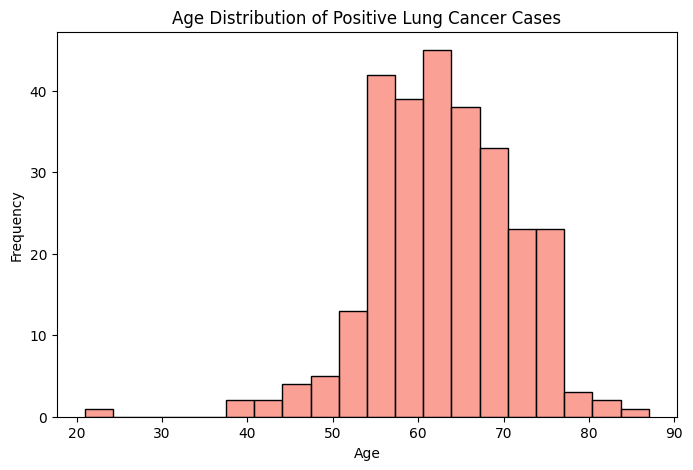

In [299]:
# Age distribution for positive cases
plt.figure(figsize=(8, 5))
sns.histplot(positive_cases['AGE'], bins=20, color='salmon')
plt.title("Age Distribution of Positive Lung Cancer Cases")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

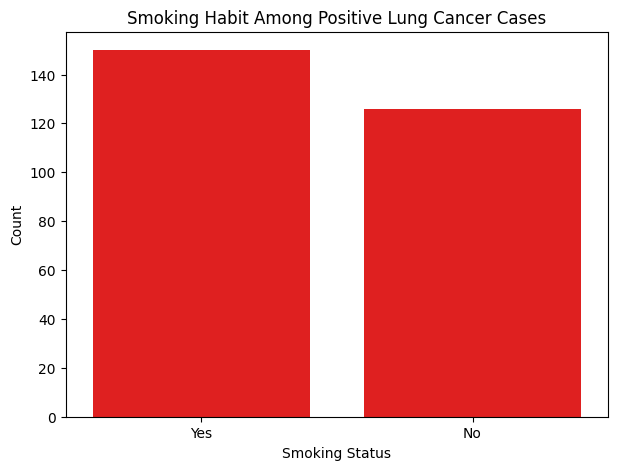

In [300]:
# Smoking status among positive cases
smoking_status = positive_cases['SMOKING'].value_counts()
smoking_labels = {1: 'No', 2: 'Yes'}

# Apply the mapping to the index of smoking_status
smoking_status.index = smoking_status.index.map(smoking_labels)

# Plotting the bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x=smoking_status.index, y=smoking_status.values, color="red")
plt.title("Smoking Habit Among Positive Lung Cancer Cases")
plt.ylabel("Count")
plt.xlabel("Smoking Status")
plt.show()

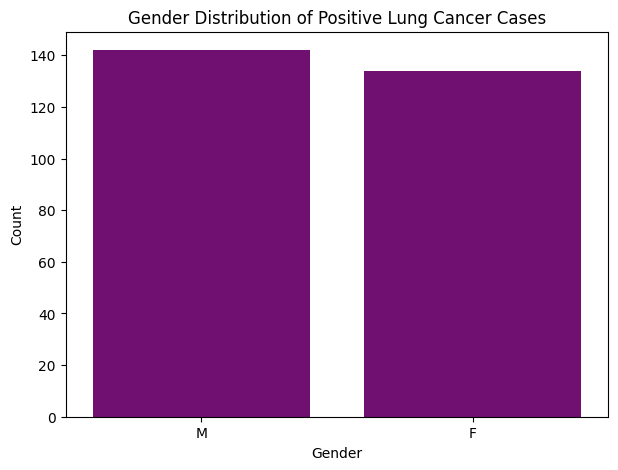

In [301]:
# Gender distribution for positive cases
gender_distribution = positive_cases['GENDER'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, color="purple")
plt.title("Gender Distribution of Positive Lung Cancer Cases")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()

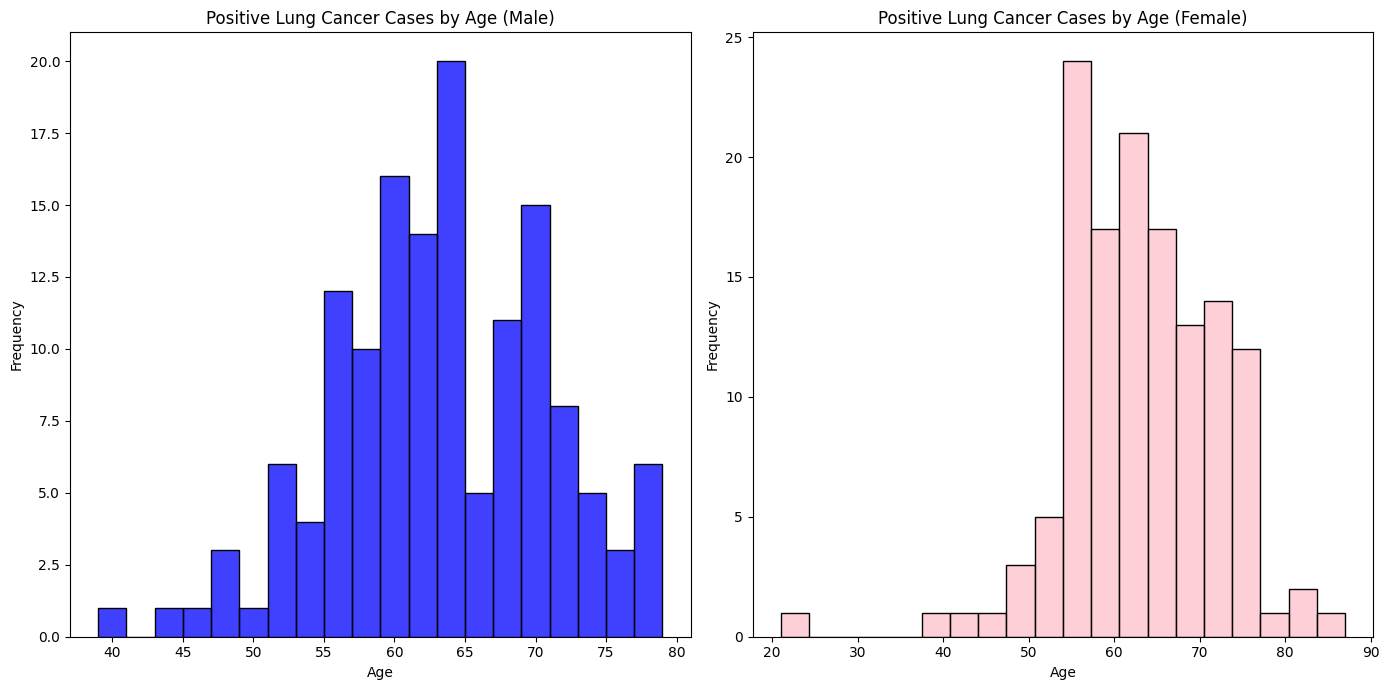

In [302]:
#Visualize positive cases of genders by age
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that positive_cases is not empty
if len(positive_cases) > 0:
    # Create the figure with proper size
    plt.figure(figsize=(14, 7))

    # Plot for Male
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the 1st plot
    sns.histplot(positive_cases[positive_cases['GENDER'] == 'M']['AGE'], bins=20, color='blue')
    plt.title("Positive Lung Cancer Cases by Age (Male)")
    plt.xlabel("Age")
    plt.ylabel("Frequency")

    # Plot for Female
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the 2nd plot
    sns.histplot(positive_cases[positive_cases['GENDER'] == 'F']['AGE'], bins=20, color='pink')
    plt.title("Positive Lung Cancer Cases by Age (Female)")
    plt.xlabel("Age")
    plt.ylabel("Frequency")

    # Adjust layout to ensure labels are not overlapping
    plt.tight_layout()

    # Finally, show the plot
    plt.show()
else:
    print("No positive cases available for plotting.")

In [303]:
# Ensure that all the relevant columns are converted to strings
positive_cases[reasons] = positive_cases[reasons].astype(str)

# Now apply the transformation and grouping
gender_reasons = positive_cases.groupby('GENDER')[reasons].apply(
    lambda df: df.apply(lambda col: (col.str.strip().str.lower() == 'yes').sum())
)

print("Reasons for lung cancer cases by gender:")
print(gender_reasons)


Reasons for lung cancer cases by gender:
        SMOKING  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE
GENDER                                                  
F             0        0              0                0
M             0        0              0                0


In [304]:
# Define the mapping
mapping = {'1': 'yes', '2': 'no'}

# Apply the mapping to transform numeric values to 'yes'/'no'
# Safely apply the mapping using .loc[]
positive_cases.loc[:, reasons] = positive_cases[reasons].replace(mapping)

# Verify transformation
for reason in reasons:
    print(f"Unique values in {reason}: {positive_cases[reason].unique()}")

# Group by 'GENDER' and count occurrences of 'yes'
gender_reasons = positive_cases.groupby('GENDER')[reasons].apply(
    lambda df: df.apply(lambda col: (col.str.strip().str.lower() == 'yes').sum())
)

print("Reasons for lung cancer cases by gender:")
print(gender_reasons)

Unique values in SMOKING: ['yes' 'no']
Unique values in ANXIETY: ['no' 'yes']
Unique values in PEER_PRESSURE: ['yes' 'no']
Unique values in CHRONIC DISEASE: ['yes' 'no']
Reasons for lung cancer cases by gender:
        SMOKING  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE
GENDER                                                  
F            64       57             48               51
M            62       82             88               81


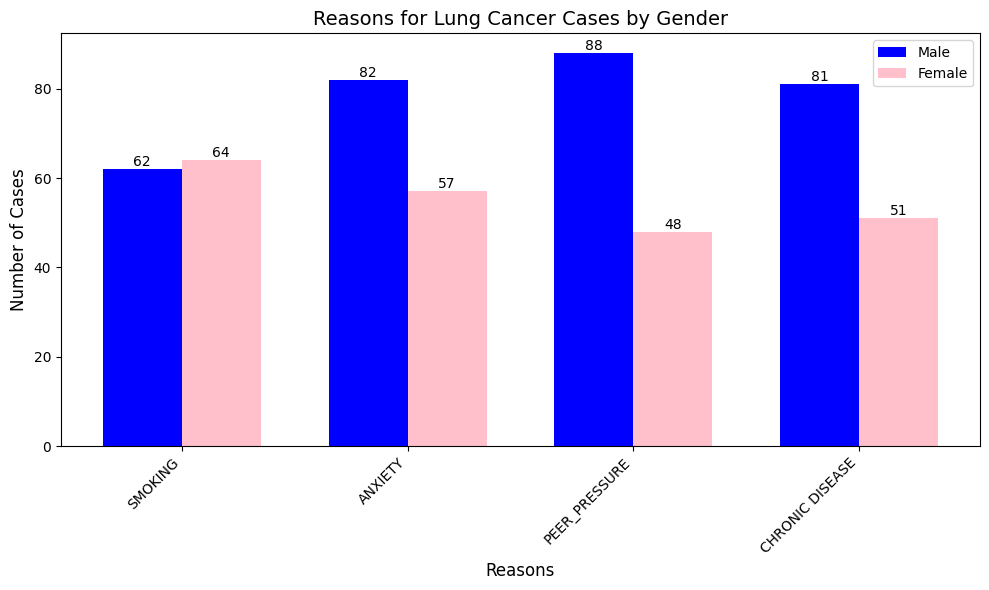

In [305]:
# gender_reasons is a DataFrame with 'GENDER' as the index and reasons as columns
# Transpose the DataFrame for easier plotting (Reasons as index, GENDER as columns)
plot_data = gender_reasons.T

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar positions
x = np.arange(len(plot_data.index))  # Number of reasons
bar_width = 0.35  # Width of each bar

# Plot bars for each gender
male_bars = ax.bar(x - bar_width / 2, plot_data['M'], bar_width, label='Male', color='blue')
female_bars = ax.bar(x + bar_width / 2, plot_data['F'], bar_width, label='Female', color='pink')

# Add labels, title, and legend
ax.set_xlabel('Reasons', fontsize=12)
ax.set_ylabel('Number of Cases', fontsize=12)
ax.set_title('Reasons for Lung Cancer Cases by Gender', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(plot_data.index, rotation=45, ha='right', fontsize=10)
ax.legend()

# Annotate the bars with the actual values
for bars in [male_bars, female_bars]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:  # Only annotate non-zero values
            ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval),
                    ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [306]:
# Replace numeric values with categorical values
df['LUNG_CANCER_ENCODED']= df['LUNG_CANCER'].replace({2: 'Yes', 1: 'NO'})
df['GENDER'] = df['GENDER'].replace({0: 'Male', 1: 'Female'})

In [307]:
# Check the columns in the dataset
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER',
       'LUNG_CANCER_ENCODED'],
      dtype='object')


In [308]:
# Encoding categorical features to numerical
le = LabelEncoder()
df['LUNG_CANCER_ENCODED'] = le.fit_transform(df['LUNG_CANCER'])  # Binary encoding for target variable
df['PEER_PRESSURE_ENCODED'] = le.fit_transform(df['PEER_PRESSURE'])
df['ANXIETY_ENCODED'] = le.fit_transform(df['ANXIETY'])
df['ALCOHOL_CONSUMING_ENCODED'] = le.fit_transform(df['ALCOHOL CONSUMING'])
df['SMOKING_ENCODED'] = le.fit_transform(df['SMOKING'])
df['CHRONIC_DISEASE_ENCODED'] = le.fit_transform(df['CHRONIC DISEASE'])
df['GENDER_ENCODED'] = le.fit_transform(df['GENDER'])  # Binary encoding for gender

In [309]:
# Keep the original columns, but only use encoded columns for modeling
X = df[['PEER_PRESSURE_ENCODED', 'ANXIETY_ENCODED', 'ALCOHOL_CONSUMING_ENCODED',
        'SMOKING_ENCODED', 'CHRONIC_DISEASE_ENCODED', 'GENDER_ENCODED']]  # Features
y = df['LUNG_CANCER_ENCODED']  # Target variable

In [310]:
# Check the data types of the dataframe to ensure all are numeric
print(df.dtypes)

GENDER                       object
AGE                           int64
SMOKING                       int64
YELLOW_FINGERS                int64
ANXIETY                       int64
PEER_PRESSURE                 int64
CHRONIC DISEASE               int64
FATIGUE                       int64
ALLERGY                       int64
WHEEZING                      int64
ALCOHOL CONSUMING             int64
COUGHING                      int64
SHORTNESS OF BREATH           int64
SWALLOWING DIFFICULTY         int64
CHEST PAIN                    int64
LUNG_CANCER                  object
LUNG_CANCER_ENCODED           int64
PEER_PRESSURE_ENCODED         int64
ANXIETY_ENCODED               int64
ALCOHOL_CONSUMING_ENCODED     int64
SMOKING_ENCODED               int64
CHRONIC_DISEASE_ENCODED       int64
GENDER_ENCODED                int64
dtype: object


In [311]:
# Splitting features (X) and target (y)
# X contains the predictor features (all numeric features)
X = df[['PEER_PRESSURE_ENCODED', 'ANXIETY_ENCODED', 'ALCOHOL_CONSUMING_ENCODED',
        'SMOKING_ENCODED', 'CHRONIC_DISEASE_ENCODED', 'GENDER_ENCODED']]  # Features

# y contains the target variable (whether the person has lung cancer or not)
y = df['LUNG_CANCER_ENCODED']  # Target variable (encoded as 0 or 1)

In [312]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'GENDER' column to numerical values: Male -> 0, Female -> 1
df['GENDER_ENCODED'] = le.fit_transform(df['GENDER'])

# Verify that the GENDER_ENCODED column contains numeric values
print(df[['GENDER', 'GENDER_ENCODED']].head())  # Checking original vs encoded gender

  GENDER  GENDER_ENCODED
0      M               1
1      M               1
2      F               0
3      M               1
4      F               0


In [313]:
# Handling class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [314]:
# Split the balanced dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [315]:
# Logistic Regression with Hyperparameter Tuning using GridSearchCV
param_grid_log_reg = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}
log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Best parameters for Logistic Regression:", log_reg.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.8645833333333334
              precision    recall  f1-score   support

           0       0.90      0.85      0.87        52
           1       0.83      0.89      0.86        44

    accuracy                           0.86        96
   macro avg       0.86      0.87      0.86        96
weighted avg       0.87      0.86      0.86        96



In [165]:
# SVM with Hyperparameter Tuning using GridSearchCV
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Best parameters for SVM:", svm.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
SVM Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        52
           1       0.93      0.89      0.91        44

    accuracy                           0.92        96
   macro avg       0.92      0.91      0.92        96
weighted avg       0.92      0.92      0.92        96



In [166]:
# XGBoost with Hyperparameter Tuning using GridSearchCV
param_grid_xgb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]}
xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("Best parameters for XGBoost:", xgb.best_params_)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
XGBoost Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        52
           1       0.93      0.89      0.91        44

    accuracy                           0.92        96
   macro avg       0.92      0.91      0.92        96
weighted avg       0.92      0.92      0.92        96



In [167]:
# Display confusion matrices for all models
print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))


Confusion Matrix for Logistic Regression:
[[44  8]
 [ 5 39]]


In [208]:
print("\nConfusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))


Confusion Matrix for SVM:
[[49  3]
 [ 5 39]]


In [169]:
print("\nConfusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))


Confusion Matrix for XGBoost:
[[49  3]
 [ 5 39]]


In [179]:
import shap
import matplotlib.pyplot as plt

# Ensure you're using SHAP's TreeExplainer correctly
explainer = shap.TreeExplainer(xgb.best_estimator_)
shap_values = explainer(X_test)  # Explainer now returns a SHAP values object

In [180]:
print(shap_values.values[:10])  # Inspect the first 10 rows of SHAP values

[[-1.2625017   0.90767574 -1.5865597   0.10429755 -2.0019648   0.75191534]
 [-1.0793424   2.5170307  -1.7038872   1.3144503   2.1541321   0.2955434 ]
 [-0.17419255  0.5138463   1.3626918   1.2125908   2.2631776   0.82037324]
 [-0.07311148  0.27540854  1.7081581  -0.20142026  3.0862634   1.2188134 ]
 [ 0.80805576  0.433872    0.7970132   1.8046379   1.0279468   0.21509756]
 [-1.0561556  -0.40468982 -2.2253299  -0.12848796  2.8114543  -0.36755162]
 [-1.320158    1.3666167  -1.3441567  -0.19395751 -1.5911821   1.4101983 ]
 [ 1.3627576   1.3710994  -0.5323801   1.0087441   1.770148    0.64111865]
 [ 2.5534732   2.7913213  -0.95883197  0.82964885  1.4718273   0.6161773 ]
 [ 0.80805576  0.433872    0.7970132   1.8046379   1.0279468   0.21509756]]


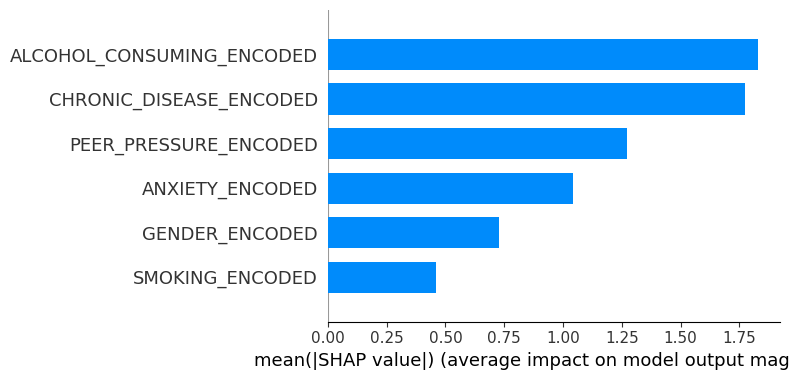

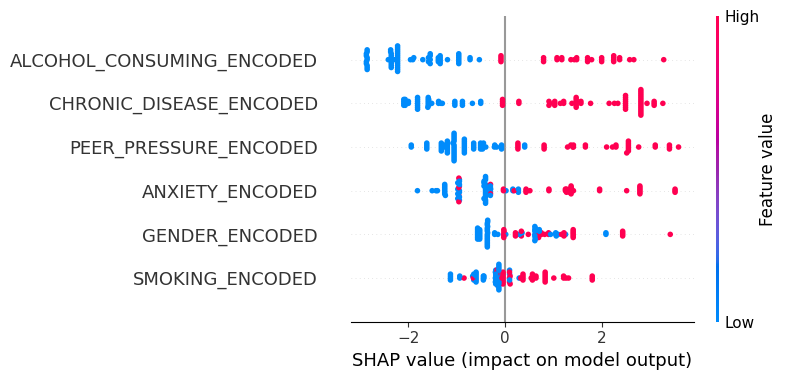

In [181]:
import shap
import matplotlib.pyplot as plt

# Plot summary bar plot
shap.summary_plot(shap_values.values, X_test, plot_type="bar", max_display=10)

# Alternative: General Summary Plot
shap.summary_plot(shap_values.values, X_test)

In [176]:
import pandas as pd

# Aggregate mean absolute SHAP values per feature
mean_abs_shap = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean_Abs_SHAP': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean_Abs_SHAP', ascending=False)

print(mean_abs_shap.head(10))  # Top 10 features

                     Feature  Mean_Abs_SHAP
2  ALCOHOL_CONSUMING_ENCODED       1.830724
4    CHRONIC_DISEASE_ENCODED       1.775184
0      PEER_PRESSURE_ENCODED       1.273226
1            ANXIETY_ENCODED       1.041843
5             GENDER_ENCODED       0.728643
3            SMOKING_ENCODED       0.461703


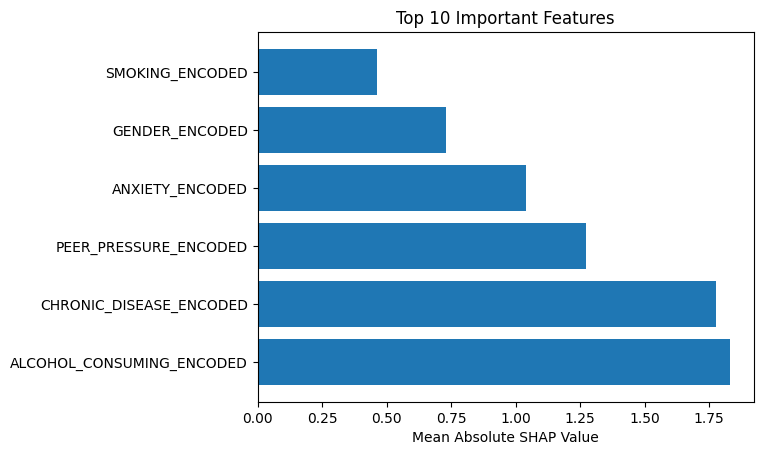

In [177]:
plt.barh(mean_abs_shap['Feature'][:10], mean_abs_shap['Mean_Abs_SHAP'][:10])
plt.xlabel("Mean Absolute SHAP Value")
plt.title("Top 10 Important Features")
plt.show()

In [186]:
num_rows = X_test.shape[0]
print(f"Number of rows in the test dataset: {num_rows}")

Number of rows in the test dataset: 96


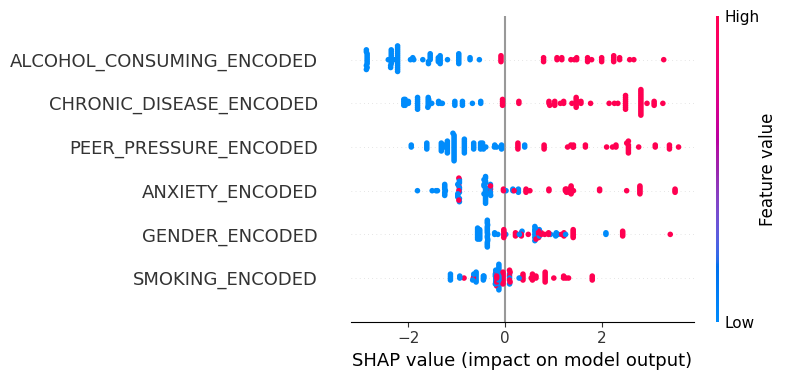

In [195]:
shap.summary_plot(shap_values, X_test)

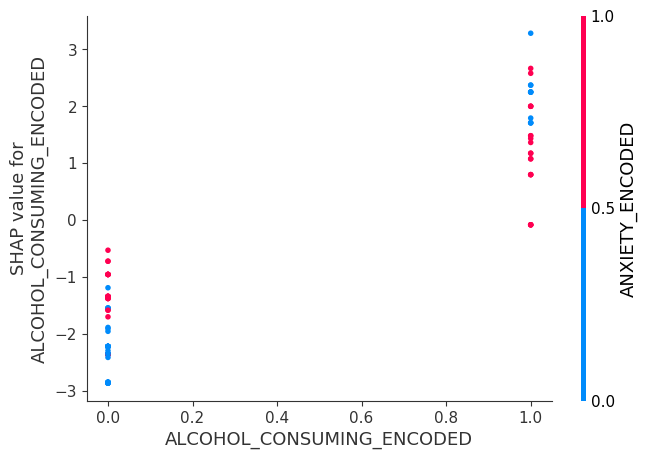

In [198]:
# Extract the SHAP values from the Explanation object
shap_values_extracted = shap_values.values if hasattr(shap_values, 'values') else shap_values

# Ensure you use the correct SHAP values for binary classification (e.g., shap_values[1] for the positive class)
if isinstance(shap_values_extracted, list):
    shap_values_to_use = shap_values_extracted[1]  # Use SHAP values for the positive class
else:
    shap_values_to_use = shap_values_extracted

# Plot dependence plot
feature_name = 'ALCOHOL_CONSUMING_ENCODED'  # Make sure this feature exists in X_test.columns
shap.dependence_plot(feature_name, shap_values_to_use, X_test)

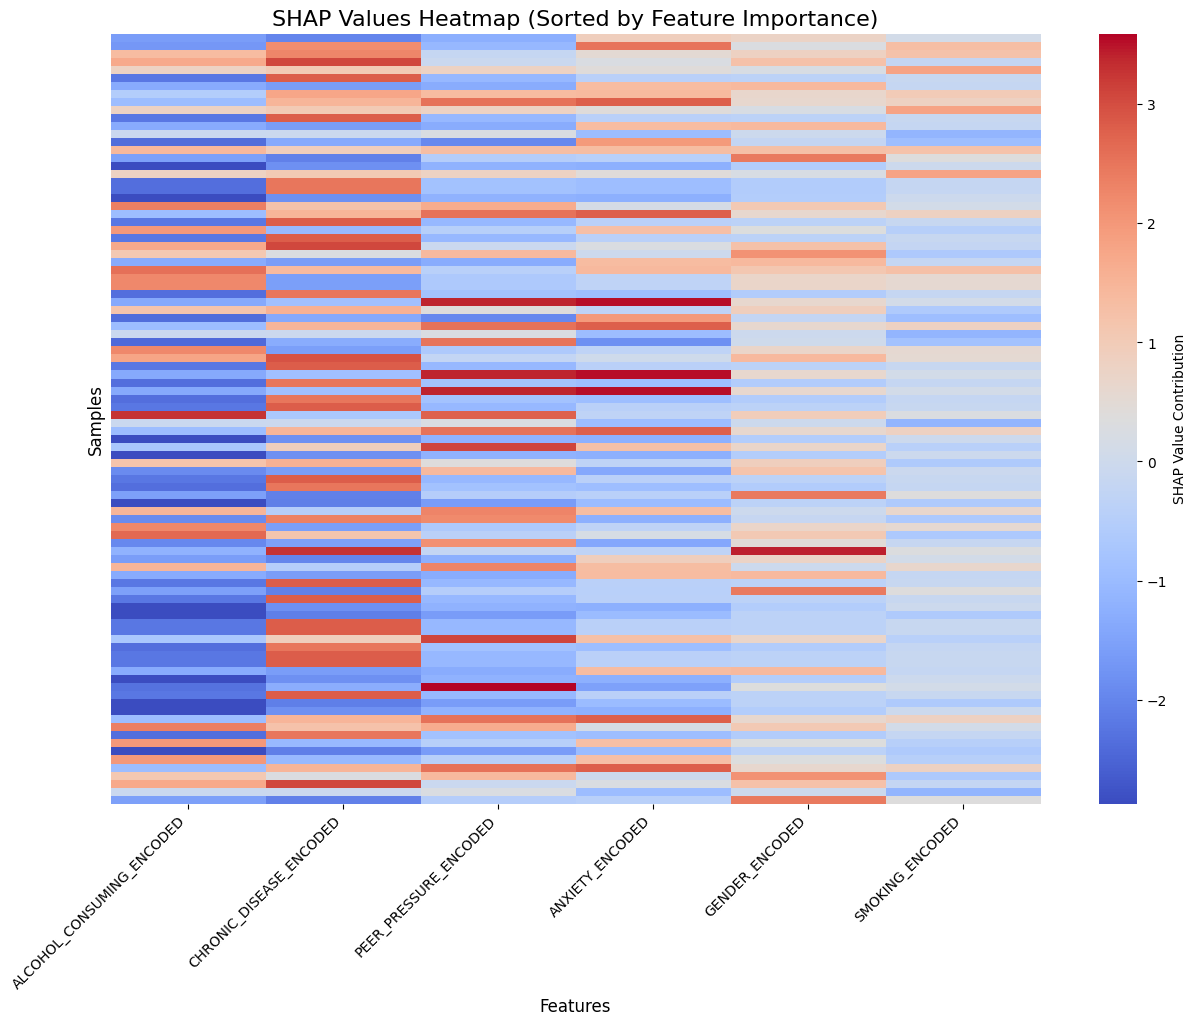

In [203]:
# Compute mean absolute SHAP values for sorting columns
mean_abs_shap = np.abs(shap_values_matrix).mean(axis=0)
sorted_indices = np.argsort(mean_abs_shap)[::-1]
sorted_columns = X_test.columns[sorted_indices]

# Sort SHAP values matrix by the sorted column order
sorted_shap_values = shap_values_matrix[:, sorted_indices]

# Create a more appealing heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    pd.DataFrame(sorted_shap_values, columns=sorted_columns), 
    cmap="coolwarm", 
    annot=False, 
    xticklabels=sorted_columns,
    yticklabels=False,  # Optionally turn off row labels if there are many samples
    cbar_kws={'label': 'SHAP Value Contribution'}
)

# Add title and labels
plt.title("SHAP Values Heatmap (Sorted by Feature Importance)", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Samples", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()